<a href="https://colab.research.google.com/github/LazaroR-u/lecturadecvsopendatacvsfiles-LazaroR-u/blob/main/Zmumu_processing_paper-11-23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,173692,1245050481,8.9721,-1.6158,-2.7176,1,-0.0294,8.7183,13.5266,1.8709,2.7911,1,-0.0689,0.4202
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000


In [15]:
def num_bins(df,n):
  r = df.max()-df.min()
  return round(r/n)

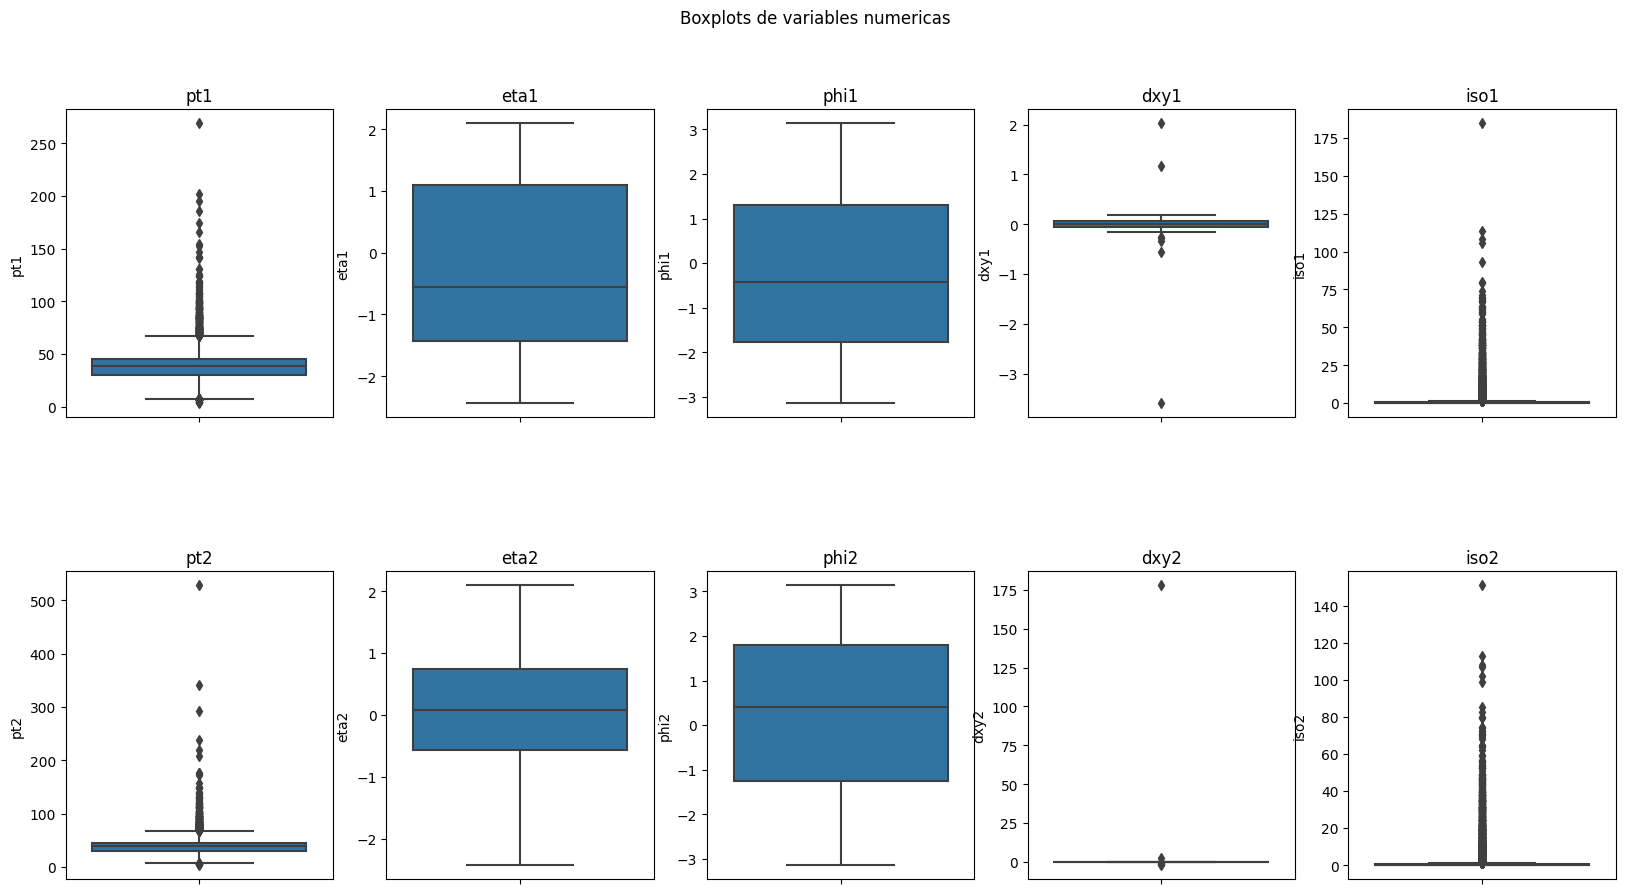

In [7]:
particles_num = particles.iloc[:,2:]
particles_num2 = particles_num.drop(columns=["Q1","Q2"])
# Crea una figura con 10 subplots (uno para cada columna)


fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(particles_num2.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=particles_num2, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas')

# Muestra la figura
plt.show()

# corte 1




Aplicamos los filtros que aparecen ya realizados en los datos que el CERN proporcionó.

In [8]:
particles_c1 = particles[(particles["pt1"]> 20) & (particles["pt2"]> 20) & (particles["eta1"] < 2.1) & (particles["eta2"] < 2.1)]
particles_c1

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.3160
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000


Pasamos de 10000 a 8579 datos despues de aplicar este corte   

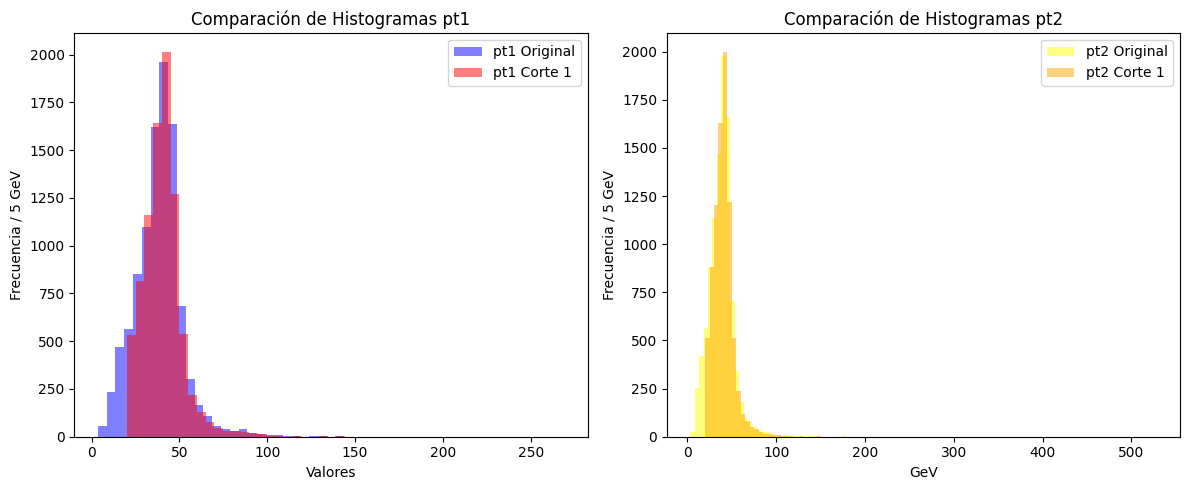

In [16]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots en 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1 en el primer subplot
axes[0].hist(particles['pt1'], bins=num_bins(particles.pt1, 5), alpha=0.5, label='pt1 Original', color='blue')
axes[0].hist(particles_c1['pt1'], bins=num_bins(particles_c1.pt1, 5), alpha=0.5, label='pt1 Corte 1', color='red')

# Configuración del primer subplot
axes[0].set_title('Comparación de Histogramas pt1')
axes[0].set_xlabel('Valores')
axes[0].set_ylabel('Frecuencia / 5 GeV')
axes[0].legend()

# Histograma 2 en el segundo subplot
axes[1].hist(particles['pt2'], bins=num_bins(particles.pt2,5), alpha=0.5, label='pt2 Original', color='yellow')
axes[1].hist(particles_c1['pt2'], bins=num_bins(particles_c1.pt2,5), alpha=0.5, label='pt2 Corte 1', color='orange')

# Configuración del segundo subplot
axes[1].set_title('Comparación de Histogramas pt2')
axes[1].set_xlabel('GeV')
axes[1].set_ylabel('Frecuencia / 5 GeV')
axes[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()


Distribucion de los datos numericos despues del corte

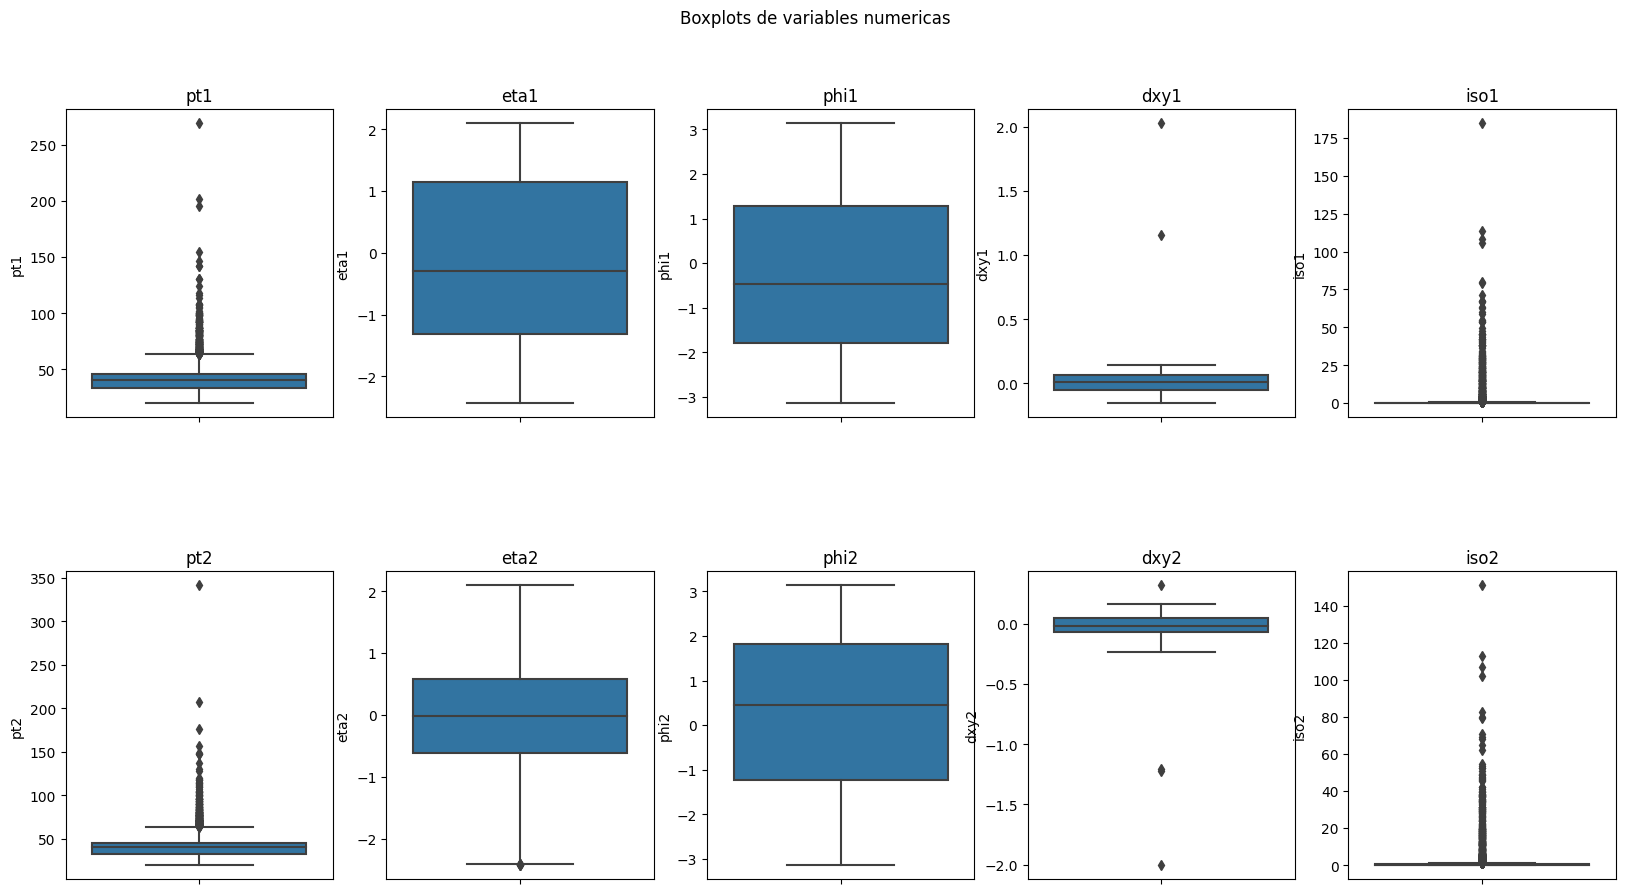

In [17]:
particles_num = particles_c1.iloc[:,2:]
particles_num2 = particles_num.drop(columns=["Q1","Q2"])
# Crea una figura con 10 subplots (uno para cada columna)


fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(particles_num2.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=particles_num2, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas')

# Muestra la figura
plt.show()

In [18]:
particles_no_C = particles_c1[particles_c1["Q1"] == particles_c1["Q2"]]
particles_no_C

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
113,165617,96375401,21.9996,1.1763,2.1764,1,-0.0834,184.7280,33.9558,0.0720,-0.9118,1,0.0808,112.7960
181,165617,109654027,39.7445,-0.9623,2.8095,1,-0.0650,7.5349,24.8923,0.0912,-0.3996,1,0.0620,27.6101
201,165617,113056855,26.1068,-1.0576,0.4603,-1,-0.0009,4.3753,82.5483,-0.2709,-2.7011,-1,-0.0033,0.0000
216,165617,116433496,47.2575,-0.9447,-1.7969,-1,0.0832,22.9103,35.7149,-0.7476,1.3231,-1,-0.0662,34.8291
282,165617,128341617,25.5220,-1.4478,-1.5186,1,0.0390,15.6933,30.9889,0.7049,1.9027,1,-0.1237,11.5873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9229,173381,206465042,44.2955,-1.8014,-1.5347,1,0.0755,0.0000,21.1534,-0.3705,1.1926,1,-1.2095,0.0000
9486,173381,243084772,47.9935,-0.5225,-3.1395,1,-0.0460,0.7254,42.4145,-0.0174,-0.0654,1,0.0491,0.3642
9616,173381,257342137,38.9503,0.4704,2.4555,-1,-0.0823,2.3340,33.1548,0.1342,-0.4056,-1,0.0676,4.5636
9733,173692,1214853642,22.8847,-1.3276,-2.4785,-1,0.0031,1.5324,41.2705,-0.7931,0.9604,-1,-0.0262,17.6573


# corte 2

Ahora, aplicamos un corte basado en el analisis de los datos. Notamos que en las variables dxy1, dxy2, iso1, iso2, incluso pt1 y pt2 tenemos datos atipicos, es decir, datos que se alejan demasiado del rango donde se concentran los datos.

Es por ello que realizamos un filtro para conservar el 92% de los datos, es decir, eliminamos los extremos

In [19]:
df_pt_menor = particles[(particles["pt1"]<20) | (particles["pt2"]<20)]
df_pt_menor

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
7,165617,76661162,17.3593,-1.4809,-1.7046,-1,0.1411,25.9167,19.9872,0.8018,1.8758,1,-0.1022,6.9232
14,165617,78956967,12.3659,-1.9390,-2.5886,1,0.0771,0.0000,22.0062,0.6683,0.8609,-1,-0.0346,20.8031
19,165617,78693707,21.3986,-1.6865,0.0905,1,0.0263,4.4573,10.8491,1.2098,3.0488,1,-0.0430,38.1065
23,165617,80284893,3.4637,-0.7705,-2.8897,-1,-0.0150,14.5386,528.4340,-0.0208,0.2602,1,0.1706,23.7230
37,165617,82030579,84.6196,-2.3201,-2.9572,-1,-0.0227,0.0000,15.6229,-0.9427,-0.3584,1,0.0598,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,173692,1241919037,11.3474,-2.3745,0.1494,-1,0.0328,0.0000,33.1899,0.6048,-2.8430,1,-0.0192,0.0000
9962,173692,1241426747,26.6574,1.7058,2.3984,-1,-0.1013,0.0000,19.7586,-0.8027,-1.1238,-1,0.0860,0.0000
9963,173692,1241531867,46.6209,1.8526,-1.6105,1,0.0757,4.6914,19.4970,-0.3466,0.2387,-1,0.0299,0.0000
9989,173692,1244049390,118.4730,-1.9414,2.6858,1,-0.0779,0.0000,12.3124,-0.8167,-0.2918,-1,0.0632,0.0000


In [20]:
df_iso_mayor = particles[(particles["iso1"]>1.5) | (particles["iso2"]>1.5)]
#df_iso_mayor[particles["Q1"] == particles["Q2"]]
df_iso_mayor

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
6,165617,76042048,42.8278,-0.9549,-0.2418,-1,0.0513,0.6926,48.9864,-1.2183,2.8399,1,-0.0545,2.2525
7,165617,76661162,17.3593,-1.4809,-1.7046,-1,0.1411,25.9167,19.9872,0.8018,1.8758,1,-0.1022,6.9232
10,165617,76405662,42.4714,-0.6696,-1.6303,-1,0.0728,1.0343,45.5961,-0.9944,1.3510,1,-0.0672,2.5457
14,165617,78956967,12.3659,-1.9390,-2.5886,1,0.0771,0.0000,22.0062,0.6683,0.8609,-1,-0.0346,20.8031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,173692,1241904948,46.1085,0.1132,-2.9623,-1,-0.0346,2.4160,40.6873,0.2190,0.2179,1,0.0335,0.0000
9963,173692,1241531867,46.6209,1.8526,-1.6105,1,0.0757,4.6914,19.4970,-0.3466,0.2387,-1,0.0299,0.0000
9981,173692,1244426119,58.7971,-0.9776,2.9393,-1,-0.0598,0.0000,34.5705,-0.4639,-0.3992,1,0.0736,10.7656
9986,173692,1244277763,43.3190,-0.9359,2.5338,1,-0.0792,0.5853,34.4387,-2.0494,-0.6897,-1,0.0813,1.6567


In [21]:
Q3 = particles["pt1"].quantile(0.95)
Q3

59.06506

In [22]:
Q1 = particles["iso1"].quantile(0.25)

Q3 = particles["iso1"].quantile(0.85)

IQR = Q3 - Q1
IQR

1.1269249999999995

In [23]:
def remove_outliers(df, threshold=1.5):
    # Seleccionar solo las columnas numéricas de tipo float64
    numeric_columns = ["iso1","iso2", "dxy1", "dxy2", "pt1", "pt2"]

    # Crear una copia del DataFrame original
    df_filtered = df.copy()

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filtrar las filas que no contienen outliers en la columna actual
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

particles_c2 = remove_outliers(particles)
particles_c2

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
5,165617,77255513,38.9425,0.3522,-2.2649,-1,0.0384,0.0000,39.8616,0.2630,0.9183,1,-0.0407,0.0000
8,165617,77076988,38.1511,-0.8702,1.7165,1,-0.0840,0.0000,37.8959,0.5000,-1.8676,-1,0.0652,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.3160
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000


In [24]:
particles_no_C = particles_c2[particles_c2["Q1"] == particles_c2["Q2"]]
len(particles_no_C)

15

In [25]:
particles_c2[(particles_c2["pt1"] < 20) & (particles_c2["pt2"] < 20) & (particles_c2["eta1"] < 2.1) & (particles_c2["eta2"] < 2.1)]

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
40,165617,82580550,15.7847,-1.5813,2.1951,1,-0.0839,0.3245,18.1249,0.8681,-0.8883,-1,0.0800,0.0000
73,165617,89350404,15.5846,-1.7143,-1.1753,-1,0.0826,0.8905,13.8210,1.9399,2.0820,1,-0.0912,0.7835
207,165617,114344424,13.8471,-1.4888,-2.8431,-1,-0.0144,0.0000,14.7322,2.0256,0.1697,1,0.0248,0.3753
254,165617,124301500,16.5486,-1.0648,2.3465,1,-0.0817,0.0000,19.3202,2.0754,-1.0161,-1,0.0833,0.0000
276,165617,128272294,18.3119,-2.3982,-1.4592,1,0.0771,0.0000,19.3050,0.5472,1.6050,-1,-0.0790,1.2723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9383,173381,230459328,17.1278,-1.8798,-0.2260,-1,0.0621,0.0000,15.4271,1.4503,3.0054,1,-0.0575,0.0000
9583,173381,253591384,12.9773,-2.1718,2.8058,-1,-0.0645,0.0000,17.6379,1.2632,1.5292,1,-0.0717,0.0000
9699,173692,1211270696,19.9740,-1.5432,-3.0741,1,-0.0449,0.0000,18.7311,1.3543,-0.8137,-1,0.0896,0.0000
9751,173692,1217513862,16.0064,-1.4170,-0.5289,1,0.0799,0.0000,19.7803,1.8295,2.9384,-1,-0.0644,0.0000


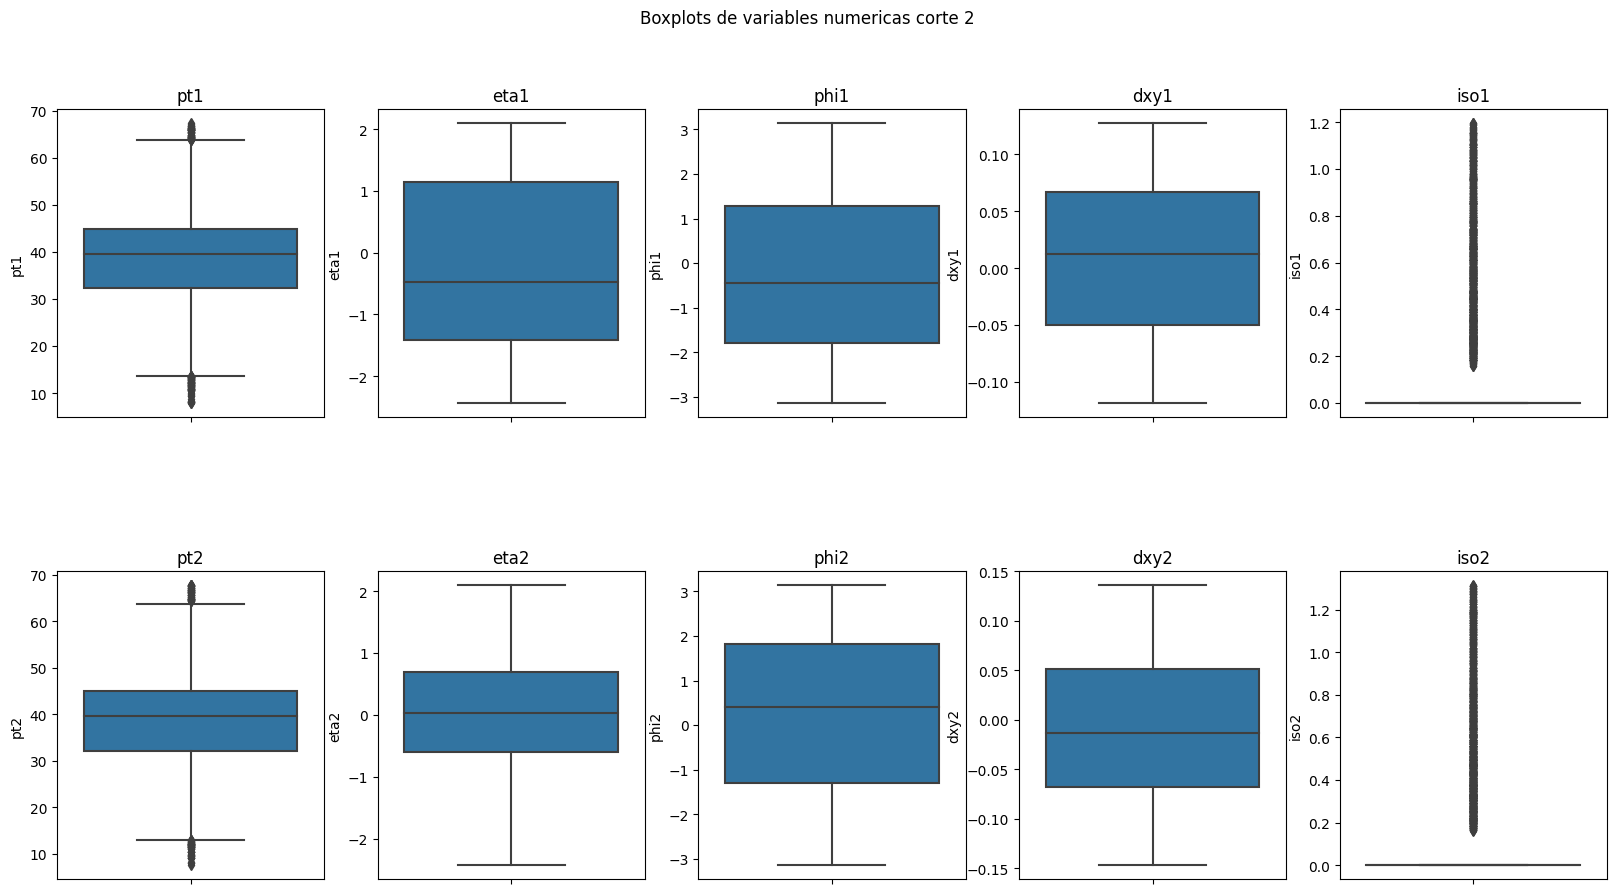

In [26]:
particles_c2_num = particles_c2.drop(columns=["Run", "Event", "Q1", "Q2"])

# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(particles_c2_num.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=particles_c2_num, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas corte 2')

# Muestra la figura
plt.show()

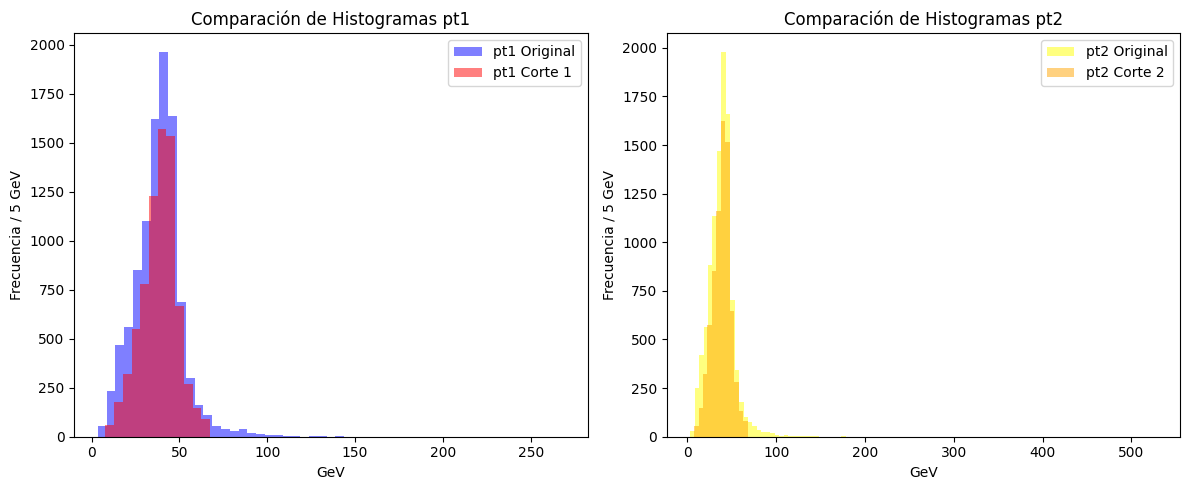

In [27]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots en 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1 en el primer subplot
axes[0].hist(particles['pt1'], bins=num_bins(particles.pt1,5), alpha=0.5, label='pt1 Original', color='blue')
axes[0].hist(particles_c2['pt1'], bins=num_bins(particles_c2.pt1,5), alpha=0.5, label='pt1 Corte 1', color='red')

# Configuración del primer subplot
axes[0].set_title('Comparación de Histogramas pt1')
axes[0].set_xlabel('GeV')
axes[0].set_ylabel('Frecuencia / 5 GeV')
axes[0].legend()

# Histograma 2 en el segundo subplot
axes[1].hist(particles['pt2'], bins=num_bins(particles.pt2,5), alpha=0.5, label='pt2 Original', color='yellow')
axes[1].hist(particles_c2['pt2'], bins=num_bins(particles_c2.pt2,5), alpha=0.5, label='pt2 Corte 2', color='orange')

# Configuración del segundo subplot
axes[1].set_title('Comparación de Histogramas pt2')
axes[1].set_xlabel('GeV')
axes[1].set_ylabel('Frecuencia / 5 GeV')
axes[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()

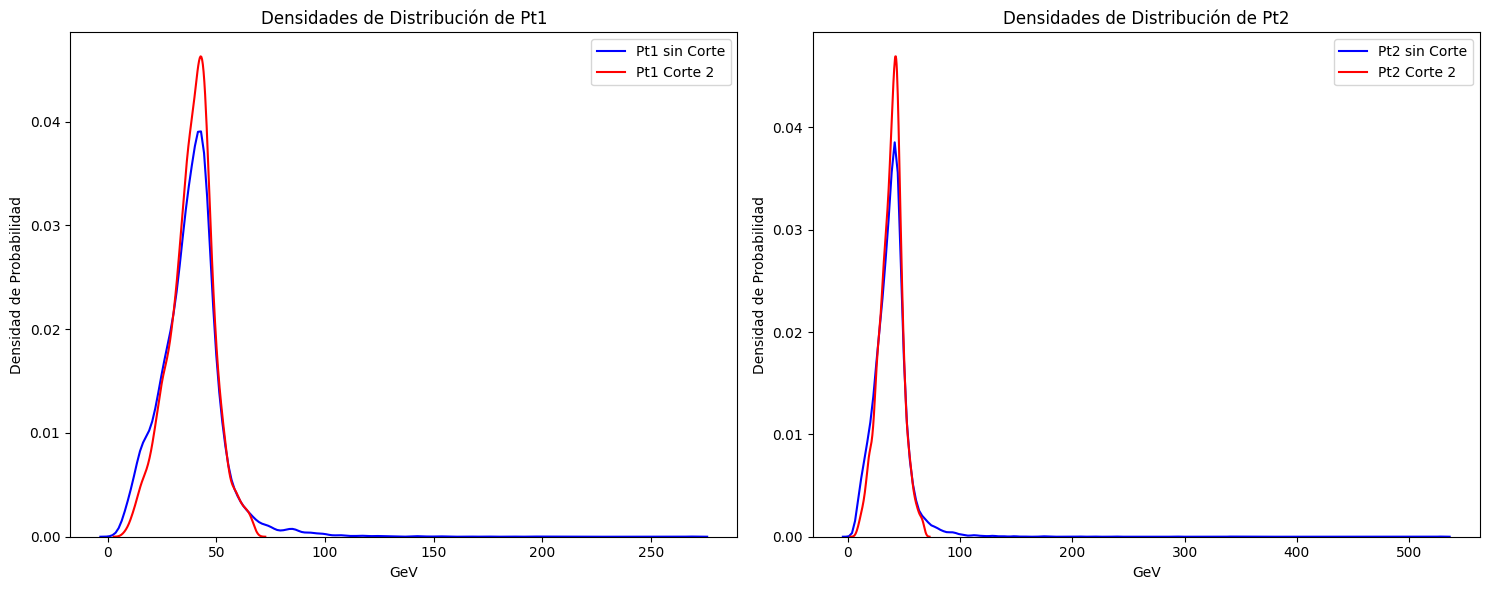

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con dos subplots en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Densidad de distribución para "pt1 sin Corte"
sns.kdeplot(data=particles["pt1"], ax=axes[0], label='Pt1 sin Corte', color='blue')
sns.kdeplot(data=particles_c2["pt1"], ax=axes[0], label='Pt1 Corte 2', color='red')
axes[0].set_title('Densidades de Distribución de Pt1')
axes[0].set_xlabel('GeV')
axes[0].set_ylabel('Densidad de Probabilidad')
axes[0].legend()

# Densidad de distribución para "pt2 sin Corte"
sns.kdeplot(data=particles["pt2"], ax=axes[1], label='Pt2 sin Corte', color='blue')
sns.kdeplot(data=particles_c2["pt2"], ax=axes[1], label='Pt2 Corte 2', color='red')
axes[1].set_title('Densidades de Distribución de Pt2')
axes[1].set_xlabel('GeV')
axes[1].set_ylabel('Densidad de Probabilidad')
axes[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


# corte 1+2

In [29]:
def remove_outliers(df, threshold=1.5):
    # Seleccionar solo las columnas numéricas de tipo float64
    numeric_columns = ["iso1","iso2", "dxy1", "dxy2", "pt1", "pt2"]

    # Crear una copia del DataFrame original
    df_filtered = df.copy()

    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filtrar las filas que no contienen outliers en la columna actual
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

particles_c12 = remove_outliers(particles_c1)
particles_c12

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.000
5,165617,77255513,38.9425,0.3522,-2.2649,-1,0.0384,0.0000,39.8616,0.2630,0.9183,1,-0.0407,0.000
8,165617,77076988,38.1511,-0.8702,1.7165,1,-0.0840,0.0000,37.8959,0.5000,-1.8676,-1,0.0652,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,173692,1243515245,52.7978,0.4135,1.7001,1,-0.0811,0.0000,39.9635,0.5128,-1.1895,-1,0.0892,0.000
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.316
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.000
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.000


In [30]:
particles_c1["pt1"].sort_values(ascending=True)

9664     20.0162
3293     20.0508
1941     20.0961
8516     20.1138
6002     20.1144
          ...   
5559    146.8070
6477    154.1400
5865    195.6480
4255    201.4940
1965    269.0800
Name: pt1, Length: 8579, dtype: float64

In [31]:
particles_c2["dxy2"].sort_values(ascending=False)

8794    0.1360
3818    0.1069
1264    0.1065
6935    0.0966
3036    0.0956
         ...  
9758   -0.0929
9956   -0.0933
7651   -0.0945
1474   -0.1306
6559   -0.1467
Name: dxy2, Length: 7390, dtype: float64

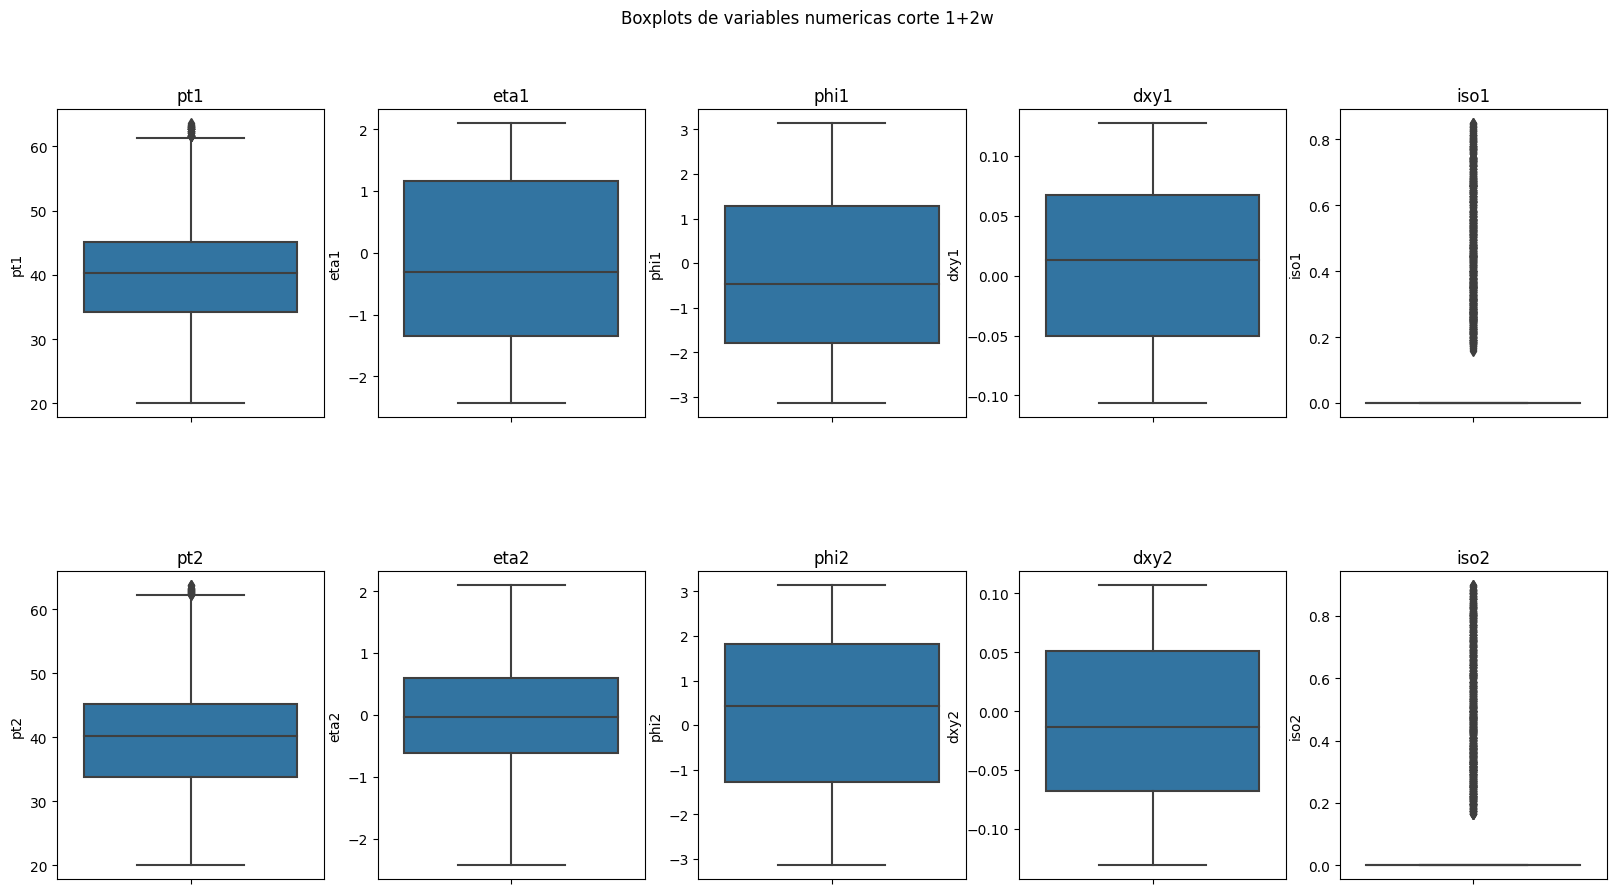

In [32]:
particles_c12_num = particles_c12.drop(columns=["Run", "Event", "Q1", "Q2"])

# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(particles_c12_num.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(data=particles_c12_num, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas corte 1+2w')

# Muestra la figura
plt.show()

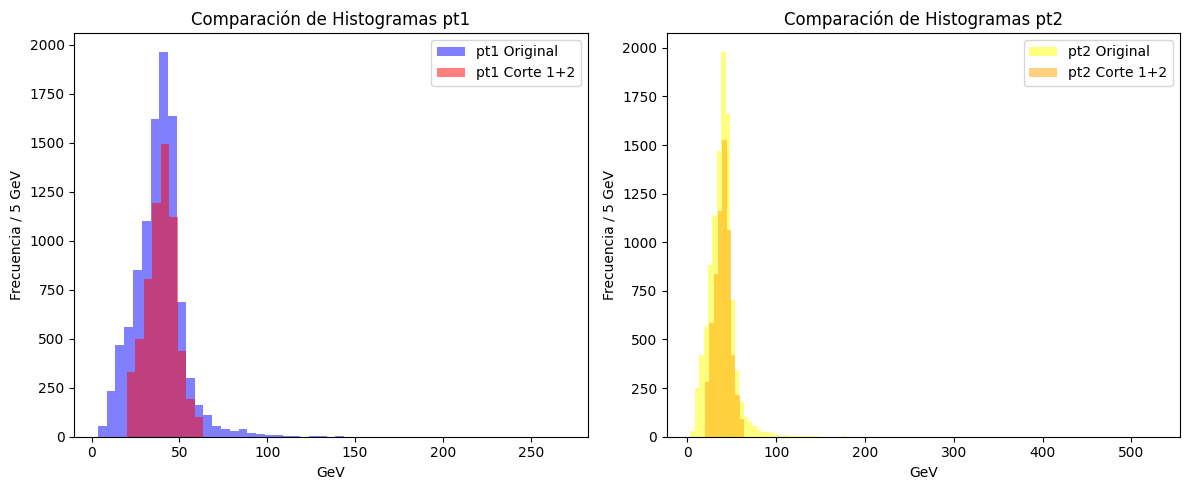

In [33]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots en 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 1 en el primer subplot
axes[0].hist(particles['pt1'], bins=num_bins(particles.pt1,5), alpha=0.5, label='pt1 Original', color='blue')
axes[0].hist(particles_c12['pt1'], bins=num_bins(particles_c12.pt1,5), alpha=0.5, label='pt1 Corte 1+2', color='red')

# Configuración del primer subplot
axes[0].set_title('Comparación de Histogramas pt1')
axes[0].set_xlabel('GeV')
axes[0].set_ylabel('Frecuencia / 5 GeV')
axes[0].legend()

# Histograma 2 en el segundo subplot
axes[1].hist(particles['pt2'], bins=num_bins(particles.pt2,5), alpha=0.5, label='pt2 Original', color='yellow')
axes[1].hist(particles_c12['pt2'], bins=num_bins(particles_c12.pt2,5), alpha=0.5, label='pt2 Corte 1+2', color='orange')

# Configuración del segundo subplot
axes[1].set_title('Comparación de Histogramas pt2')
axes[1].set_xlabel('GeV')
axes[1].set_ylabel('Frecuencia / 5 GeV')
axes[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()

$$P_{Z_{T_y}} = P_{T_{y1}}+P_{T_{y2}}$$

1.   Elemento de la lista
2.   Elemento de la lista



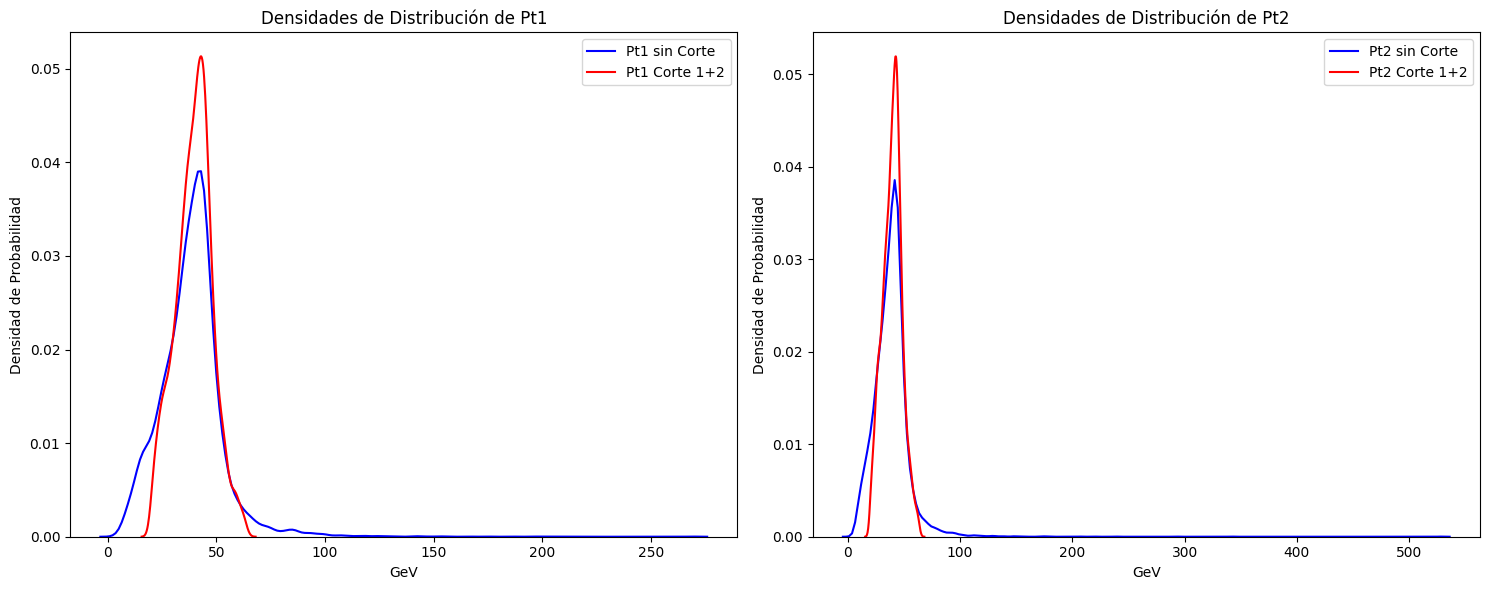

In [34]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots en una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Densidad de distribución para "pt1 sin Corte"
sns.kdeplot(data=particles["pt1"], ax=axes[0], label='Pt1 sin Corte', color='blue')
sns.kdeplot(data=particles_c12["pt1"], ax=axes[0], label='Pt1 Corte 1+2', color='red')
axes[0].set_title('Densidades de Distribución de Pt1')
axes[0].set_xlabel('GeV')
axes[0].set_ylabel('Densidad de Probabilidad')
axes[0].legend()

# Densidad de distribución para "pt2 sin Corte"
sns.kdeplot(data=particles["pt2"], ax=axes[1], label='Pt2 sin Corte', color='blue')
sns.kdeplot(data=particles_c12["pt2"], ax=axes[1], label='Pt2 Corte 1+2', color='red')
axes[1].set_title('Densidades de Distribución de Pt2')
axes[1].set_xlabel('GeV')
axes[1].set_ylabel('Densidad de Probabilidad')
axes[1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

# comparacion de masas

<ipython-input-35-2586a2fce03b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particles_c1["masa"] = np.sqrt(2*particles_c1["pt1"]*particles_c1["pt2"]*(np.cosh(particles_c1["eta2"]-particles_c1["eta1"])-np.cos(particles_c1["phi1"]-particles_c1["phi2"])))


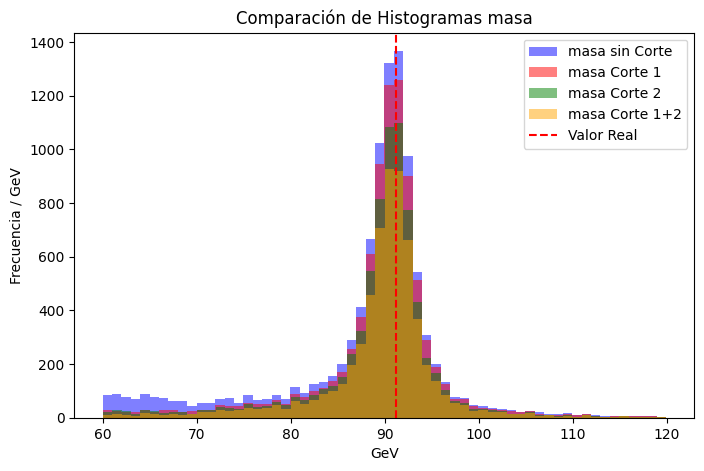

In [35]:
particles["masa"] = np.sqrt(2*particles["pt1"]*particles["pt2"]*(np.cosh(particles["eta2"]-particles["eta1"])-np.cos(particles["phi1"]-particles["phi2"])))
particles_c1["masa"] = np.sqrt(2*particles_c1["pt1"]*particles_c1["pt2"]*(np.cosh(particles_c1["eta2"]-particles_c1["eta1"])-np.cos(particles_c1["phi1"]-particles_c1["phi2"])))
particles_c2["masa"] = np.sqrt(2*particles_c2["pt1"]*particles_c2["pt2"]*(np.cosh(particles_c2["eta2"]-particles_c2["eta1"])-np.cos(particles_c2["phi1"]-particles_c2["phi2"])))
particles_c12["masa"] = np.sqrt(2*particles_c12["pt1"]*particles_c12["pt2"]*(np.cosh(particles_c12["eta2"]-particles_c12["eta1"])-np.cos(particles_c12["phi1"]-particles_c12["phi2"])))


# Crear una figura con dos subplots en 1 fila y 2 columnas

import matplotlib.pyplot as plt

# Crear una figura con un subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Histograma 1 en el primer subplot
ax.hist(particles['masa'], bins=60, alpha=0.5, label='masa sin Corte', color='blue')
ax.hist(particles_c1['masa'], bins=60, alpha=0.5, label='masa Corte 1', color='red')
ax.hist(particles_c2['masa'], bins=60, alpha=0.5, label='masa Corte 2', color='green')
ax.hist(particles_c12['masa'], bins=60, alpha=0.5, label='masa Corte 1+2', color='orange')

# Agregar una línea horizontal en y=91.1876
ax.axvline(x=91.1876, color='red', linestyle='--', label='Valor Real')

# Configuración del subplot
ax.set_title('Comparación de Histogramas masa')
ax.set_xlabel('GeV')
ax.set_ylabel('Frecuencia / GeV')
ax.legend()

# Mostrar la figura
plt.show()


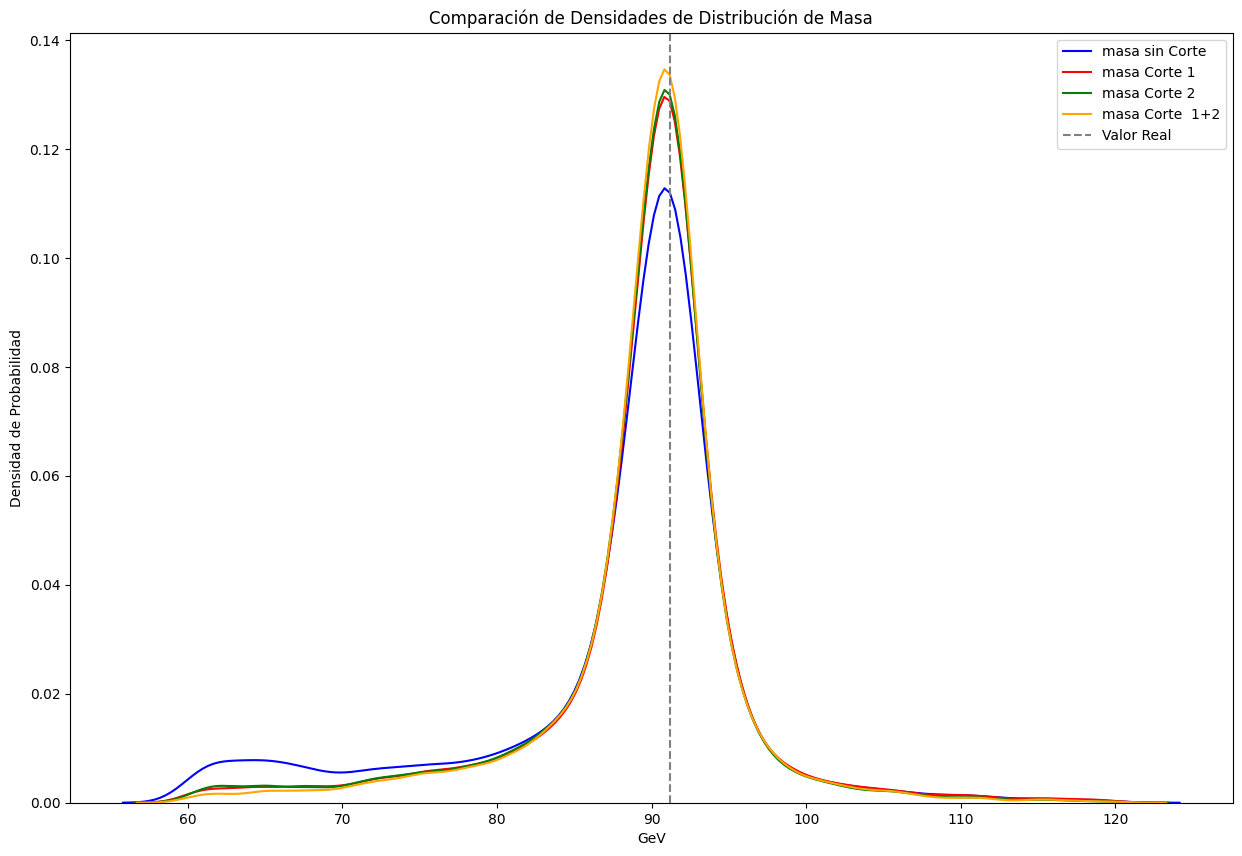

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(15, 10))

# Densidad de distribución para "masa sin Corte"
sns.kdeplot(data=particles["masa"], ax=ax, label='masa sin Corte', color='blue')

# Densidad de distribución para "masa Corte 1"
sns.kdeplot(data=particles_c1["masa"], ax=ax, label='masa Corte 1', color='red')

# Densidad de distribución para "masa Corte 2"
sns.kdeplot(data=particles_c2["masa"], ax=ax, label='masa Corte 2', color='green')

# Densidad de distribución para "masa Corte 2"
sns.kdeplot(data=particles_c12["masa"], ax=ax, label='masa Corte  1+2', color='orange')

# Configuración del gráfico
ax.set_title('Comparación de Densidades de Distribución de Masa')
ax.set_xlabel('GeV')
ax.set_ylabel('Densidad de Probabilidad')
ax.legend()


plt.axvline(x=91.1876, color='gray', linestyle='--', label='Valor Real')
plt.legend()
# Mostrar la figura
plt.show()


# extra

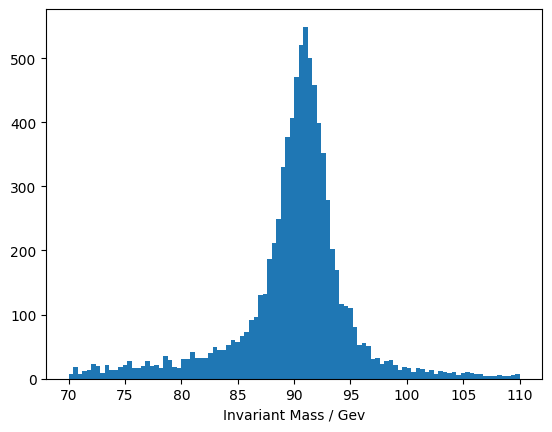

In [37]:
lower_limit = 70
upper_limit = 110
nbins=100
inv_mass=particles["masa"]
inv_mass_c1=particles_c1["masa"]
inv_mass_c2=particles_c2["masa"]
hist,bins,patches = plt.hist(inv_mass_c1,nbins,range=[lower_limit, upper_limit])
plt.xlabel('Invariant Mass / Gev')
plt.show()

In [38]:

def bin_centres(bin_edges):
    return[(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

def breitwigner(E, gamma, M, a, b, A):
    k_n= 2*np.sqrt(2)*M*gamma*np.sqrt((M**2)*((M**2)+(gamma**2)))  # K Numerator
    k_d= np.pi*np.sqrt((M**2)+np.sqrt((M**2)*((M**2)+(gamma**2))))  # K Denominator

    return a*E+b+((A*k_n)/(k_d*((((E**2)-(M**2))**2)+((M**2)*(gamma**2)))))



4.140437035028598 90.89791626119397 -0.38422797585642404 34.59724272398928 3523.440414247304


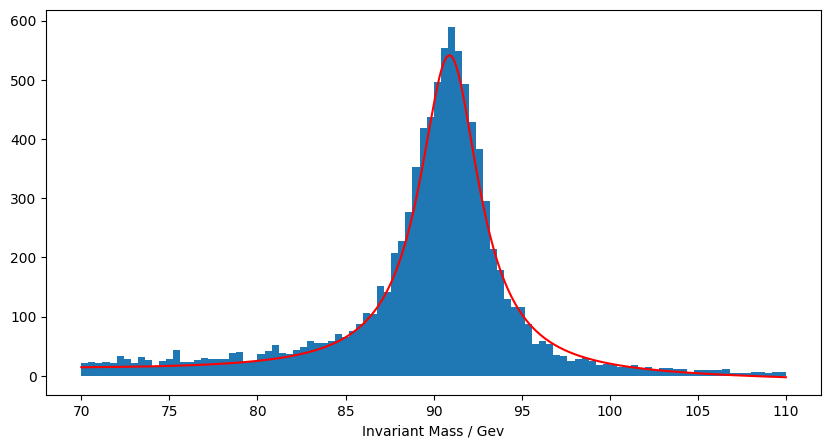

Gamma is 4.140 +/- 0.064
M is 90.898 +/- 0.019
a is -0.384 +/- 0.087
b is 34.597 +/- 7.912
A is 3523.440 +/- 45.165


In [39]:
from scipy.optimize import curve_fit

centres = bin_centres(bins)

accuracy = 1e-5
p0 = [4, 90, 1, 100, 100]
while True: # Loop until desired accuracy
    curve, covar  = curve_fit(breitwigner, centres, hist, p0)
    error = max(abs(p0-curve))
    p0 = curve
    if error < accuracy:
        break
    p0 = curve

print(*curve)

plt.figure(figsize=(10,5))

# histogram
hist,bins,patches = plt.hist(inv_mass,nbins,range=[lower_limit, upper_limit])
plt.xlabel('Invariant Mass / Gev')

# curve
xpoints = np.linspace(lower_limit,upper_limit,300)
[gamma, M, a, b, A] = curve
errors = np.sqrt(abs(np.diag(covar)))
plt.plot(xpoints,breitwigner(xpoints, -gamma, -M, a, b, A),'r-')


plt.show()


print("Gamma is","{:.3f}".format(gamma), "+/-", "{:.3f}".format(errors[0]))
print("M is","{:.3f}".format(M), "+/-","{:.3f}".format(errors[1]))
print("a is","{:.3f}".format(a), "+/-","{:.3f}".format(errors[2]))
print("b is","{:.3f}".format(b), "+/-","{:.3f}".format(errors[3]))
print("A is","{:.3f}".format(A), "+/-","{:.3f}".format(errors[4]))

28.601264680490313 -72.23372034795402 -29.94232206985896 3281.413456913277 46685.555069211005
4.140437035028598 90.89791626119397 -0.38422797585642404 34.59724272398928 3523.440414247304
4.09948134470143 90.88696544434906 -0.3848695123400333 34.40947531008479 3050.9737747004606


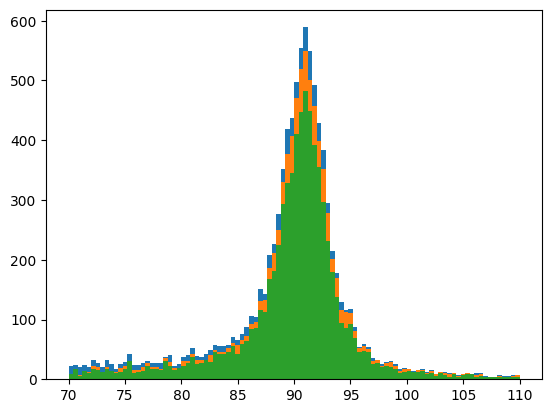

In [40]:
from scipy.optimize import curve_fit

lower_limit = 70
upper_limit = 110
nbins=100
inv_mass=particles["masa"]
inv_mass_c1=particles_c1["masa"]
inv_mass_c2=particles_c2["masa"]

# CURVA PARA DATOS ORIGINALES

hist,bins,patches = plt.hist(inv_mass,nbins,range=[lower_limit, upper_limit])

centres = bin_centres(bins)

accuracy = 1e-5
p0 = [4, 90, 1, 100, 100]
while True: # Loop until desired accuracy
    curve, covar  = curve_fit(breitwigner, centres, hist, p0)
    error = max(abs(p0-curve))
    p0 = curve
    if error < accuracy:
        break
    p0 = curve

print(*curve)

# CURVA PARA DATOS CON CORTE 1

hist1,bins1,patches1 = plt.hist(inv_mass_c1,nbins,range=[lower_limit, upper_limit])

centres1 = bin_centres(bins1)

accuracy = 1e-10
p0 = [4, 90, 1, 100, 100]
while True: # Loop until desired accuracy
    curve1, covar1  = curve_fit(breitwigner, centres1, hist1, p0)
    error = max(abs(p0-curve1))
    p0 = curve1
    if error < accuracy:
        break
    p0 = curve1

print(*curve1)

# CURVA PARA DATOS CON CORTE 2

hist2,bins2,patches2 = plt.hist(inv_mass_c2,nbins,range=[lower_limit, upper_limit])

centres2 = bin_centres(bins2)

accuracy = 1e-10
p0 = [4, 90, 1, 100, 100]
while True: # Loop until desired accuracy
    curve2, covar2  = curve_fit(breitwigner, centres2, hist2, p0)
    error = max(abs(p0-curve2))
    p0 = curve2
    if error < accuracy:
        break
    p0 = curve2

print(*curve2)



Gamma is 4.140 +/- 0.064
M is 90.898 +/- 0.019
a is -0.384 +/- 0.087
b is 34.597 +/- 7.912
A is 3523.440 +/- 45.165


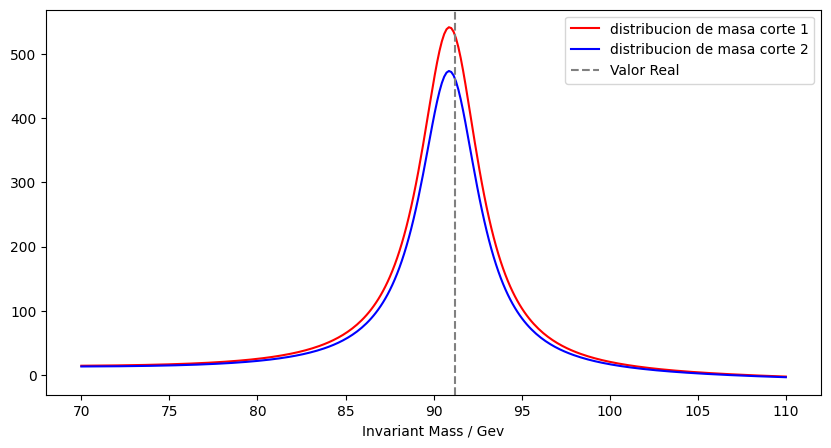

Gamma is 4.099 +/- 0.070
M is 90.887 +/- 0.021
a is -0.385 +/- 0.085
b is 34.409 +/- 7.713
A is 3050.974 +/- 43.665


In [41]:
plt.figure(figsize=(10,5))

# histogram
#hist,bins,patches = plt.hist(inv_mass_c1,nbins,range=[lower_limit, upper_limit])
plt.xlabel('Invariant Mass / Gev')

# curve
xpoints_c1 = np.linspace(lower_limit,upper_limit,300)
[gamma1, M1, a1, b1, A1] = curve1
errors1 = np.sqrt(abs(np.diag(covar1)))
plt.plot(xpoints_c1,breitwigner(xpoints_c1, -gamma1, -M1, a1, b1, A1),'r-',  label = "distribucion de masa corte 1")
plt.legend()
print("Gamma is","{:.3f}".format(gamma1), "+/-", "{:.3f}".format(errors1[0]))
print("M is","{:.3f}".format(M1), "+/-","{:.3f}".format(errors1[1]))
print("a is","{:.3f}".format(a1), "+/-","{:.3f}".format(errors1[2]))
print("b is","{:.3f}".format(b1), "+/-","{:.3f}".format(errors1[3]))
print("A is","{:.3f}".format(A1), "+/-","{:.3f}".format(errors1[4]))



xpoints_c2 = np.linspace(lower_limit,upper_limit,300)
[gamma2, M2, a2, b2, A2] = curve2
errors2 = np.sqrt(abs(np.diag(covar2)))
plt.plot(xpoints_c2,breitwigner(xpoints_c2, -gamma2, -M2, a2, b2, A2),'b-', label = "distribucion de masa corte 2")
plt.legend()

plt.axvline(x=91.1876, color='gray', linestyle='--', label='Valor Real')
plt.legend()

plt.show()


print("Gamma is","{:.3f}".format(gamma2), "+/-", "{:.3f}".format(errors2[0]))
print("M is","{:.3f}".format(M2), "+/-","{:.3f}".format(errors2[1]))
print("a is","{:.3f}".format(a2), "+/-","{:.3f}".format(errors2[2]))
print("b is","{:.3f}".format(b2), "+/-","{:.3f}".format(errors2[3]))
print("A is","{:.3f}".format(A2), "+/-","{:.3f}".format(errors2[4]))

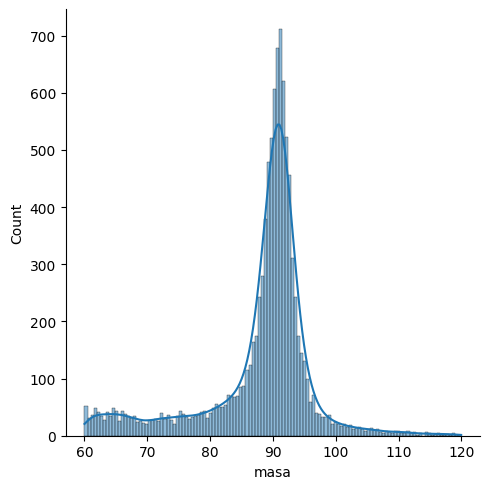

In [42]:
sns.displot(particles["masa"],kde = True )

<ipython-input-43-5f56ef63677b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particles_c1["masa"] = np.sqrt(2*particles_c1["pt1"]*particles_c1["pt2"]*(np.cosh(particles_c1["eta2"]-particles_c1["eta1"])-np.cos(particles_c1["phi1"]-particles_c1["phi2"])))


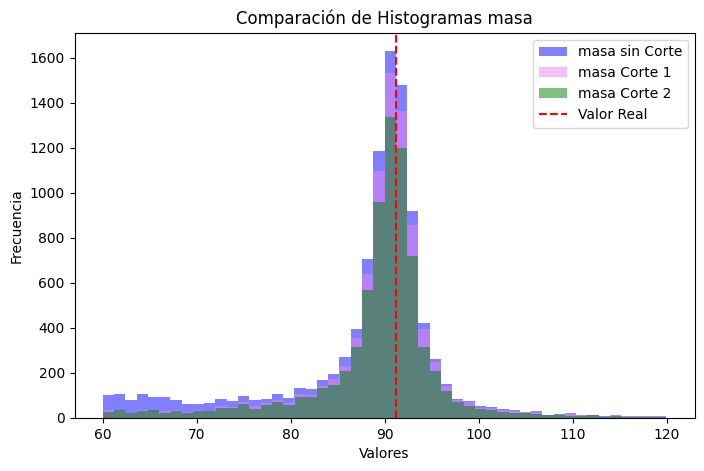

In [43]:
particles["masa"] = np.sqrt(2*particles["pt1"]*particles["pt2"]*(np.cosh(particles["eta2"]-particles["eta1"])-np.cos(particles["phi1"]-particles["phi2"])))
particles_c1["masa"] = np.sqrt(2*particles_c1["pt1"]*particles_c1["pt2"]*(np.cosh(particles_c1["eta2"]-particles_c1["eta1"])-np.cos(particles_c1["phi1"]-particles_c1["phi2"])))
particles_c2["masa"] = np.sqrt(2*particles_c2["pt1"]*particles_c2["pt2"]*(np.cosh(particles_c2["eta2"]-particles_c2["eta1"])-np.cos(particles_c2["phi1"]-particles_c2["phi2"])))


# Crear una figura con dos subplots en 1 fila y 2 columnas

import matplotlib.pyplot as plt

# Crear una figura con un subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Histograma 1 en el primer subplot
ax.hist(particles['masa'], bins=50, alpha=0.5, label='masa sin Corte', color='blue')
ax.hist(particles_c1['masa'], bins=50, alpha=0.5, label='masa Corte 1', color='violet')
ax.hist(particles_c2['masa'], bins=50, alpha=0.5, label='masa Corte 2', color='green')

# Agregar una línea horizontal en y=91.1876
ax.axvline(x=91.1876, color='red', linestyle='--', label='Valor Real')

# Configuración del subplot
ax.set_title('Comparación de Histogramas masa')
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')
ax.legend()

# Mostrar la figura
plt.show()


In [44]:
inv_mass_c12 = particles_c12["masa"]

In [45]:
inv_mass.mean(), inv_mass_c1.mean(), inv_mass_c2.mean(), inv_mass_c12.mean()

(87.97397983899457, 89.44467686475446, 89.26601582616945, 89.59939742997977)

In [46]:
inv_mass.std(), inv_mass_c1.std(), inv_mass_c2.std(),  inv_mass_c12.std()

(8.840568166875105, 7.043458744692525, 6.887450671528374, 6.352820285949908)

# Reconstruccion de Pz

$$ P_{Z_T}=\sqrt{P_{Z_{T_x}}^2 + P_{Z_{T_y}}^2 }$$

In [49]:
def zx_zy(df):
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.stats import gaussian_kde
  vx1=[]
  vy1=[]

  vx2=[]
  vy2=[]

  zx = []
  zy = []

  particles_c12_num = df.drop(columns=["Run", "Event"])

  for i in range(len(particles_c12_num)):
    # Datos del vector
    norma1 = particles_c12_num.iloc[i,0]
    angulo_radianes1 = particles_c12_num.iloc[i,2]

    norma2 = particles_c12_num.iloc[i,6]
    angulo_radianes2 = particles_c12_num.iloc[i,8]


    # Calcular componentes del vector
    Vx1 = norma1 * np.cos(angulo_radianes1)
    Vy1 = norma1 * np.sin(angulo_radianes1)

    Vx2 = norma2 * np.cos(angulo_radianes2)
    Vy2 = norma2 * np.sin(angulo_radianes2)

    vx1.append(Vx1)
    vy1.append(Vy1)
    vx2.append(Vx2)
    vy2.append(Vy2)

  for element in range(len(vx1)):
    zx.append(vx1[element]+vx2[element])

  for element in range(len(vy1)):
    zy.append(vy1[element]+vy2[element])

  x2y2 = np.vstack([zx,zy])
  z = gaussian_kde(x2y2)(x2y2)

  fig, ax = plt.subplots()
  ax.scatter(zx, zy, c=z, s=10)
  plt.title("Reconstruccion del momento transversal de Z, $P_{Z_T}$")
  plt.xlabel("$P_{Z_{Tx}}$")
  plt.ylabel("$P_{Z_{Ty}}$")
  plt.show()
  return zx, zy

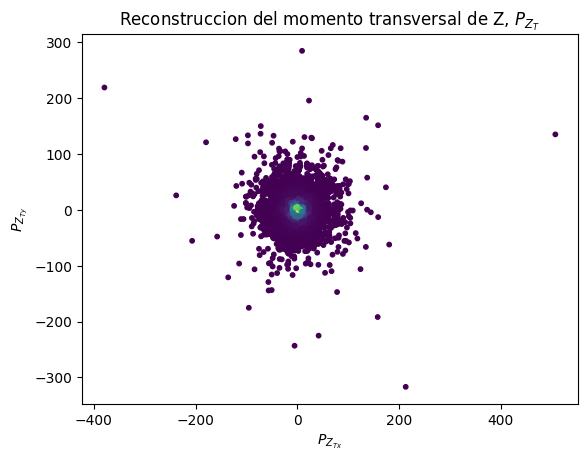

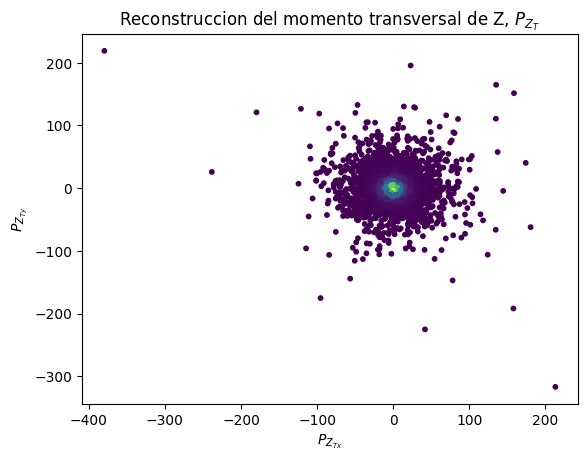

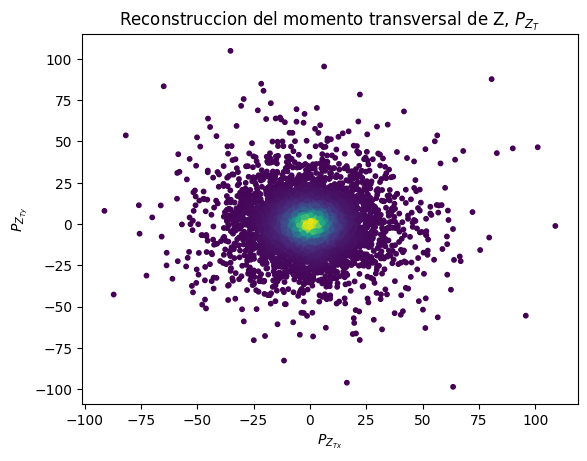

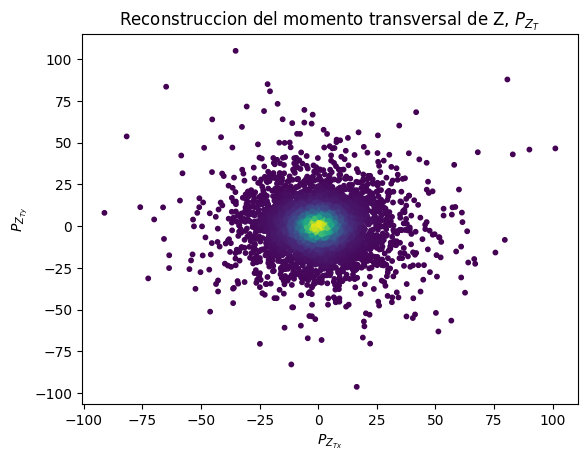

In [50]:
zx, zy = zx_zy(particles)
zx_c1, zy_c1 = zx_zy(particles_c1)
zx_c2, zy_c2 = zx_zy(particles_c2)
zx_c12, zy_c12 = zx_zy(particles_c12)

<ipython-input-51-988633d92901>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  particles_c1["ptz"] = np.sqrt(pd.Series(zx_c1)**2 + pd.Series(zy_c1)**2)


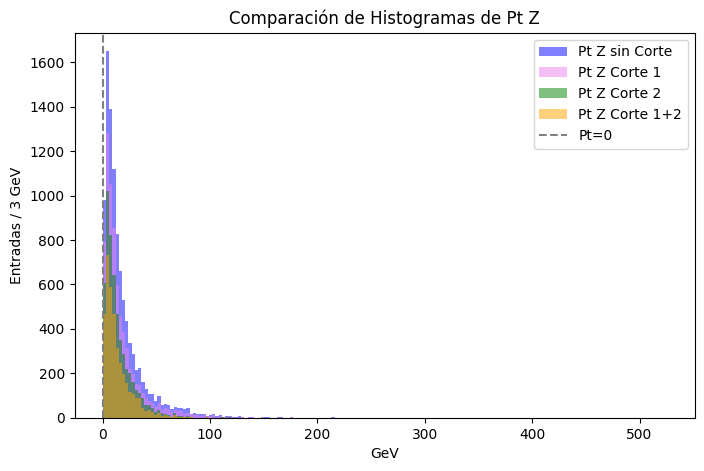

In [51]:
particles["ptz"] = np.sqrt(pd.Series(zx)**2 + pd.Series(zy)**2)
particles_c1["ptz"] = np.sqrt(pd.Series(zx_c1)**2 + pd.Series(zy_c1)**2)
particles_c2["ptz"] = np.sqrt(pd.Series(zx_c2)**2 + pd.Series(zy_c2)**2)
particles_c12["ptz"] = np.sqrt(pd.Series(zx_c12)**2 + pd.Series(zy_c12)**2)

# Crear una figura con dos subplots en 1 fila y 2 columnas

import matplotlib.pyplot as plt

# Crear una figura con un subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Histograma 1 en el primer subplot
ax.hist(particles['ptz'], bins=175, alpha=0.5, label='Pt Z sin Corte', color='blue')
ax.hist(particles_c1['ptz'], bins=146, alpha=0.5, label='Pt Z Corte 1', color='violet')
ax.hist(particles_c2['ptz'], bins=40, alpha=0.5, label='Pt Z Corte 2', color='green')
ax.hist(particles_c12['ptz'], bins=37, alpha=0.5, label='Pt Z Corte 1+2', color='orange')

# Agregar una línea horizontal en y=91.1876
ax.axvline(x=0, color='gray', linestyle='--', label='Pt=0')

# Configuración del subplot
ax.set_title('Comparación de Histogramas de Pt Z')
ax.set_xlabel('GeV')
ax.set_ylabel('Entradas / 3 GeV')
ax.legend()

# Mostrar la figura
plt.show()

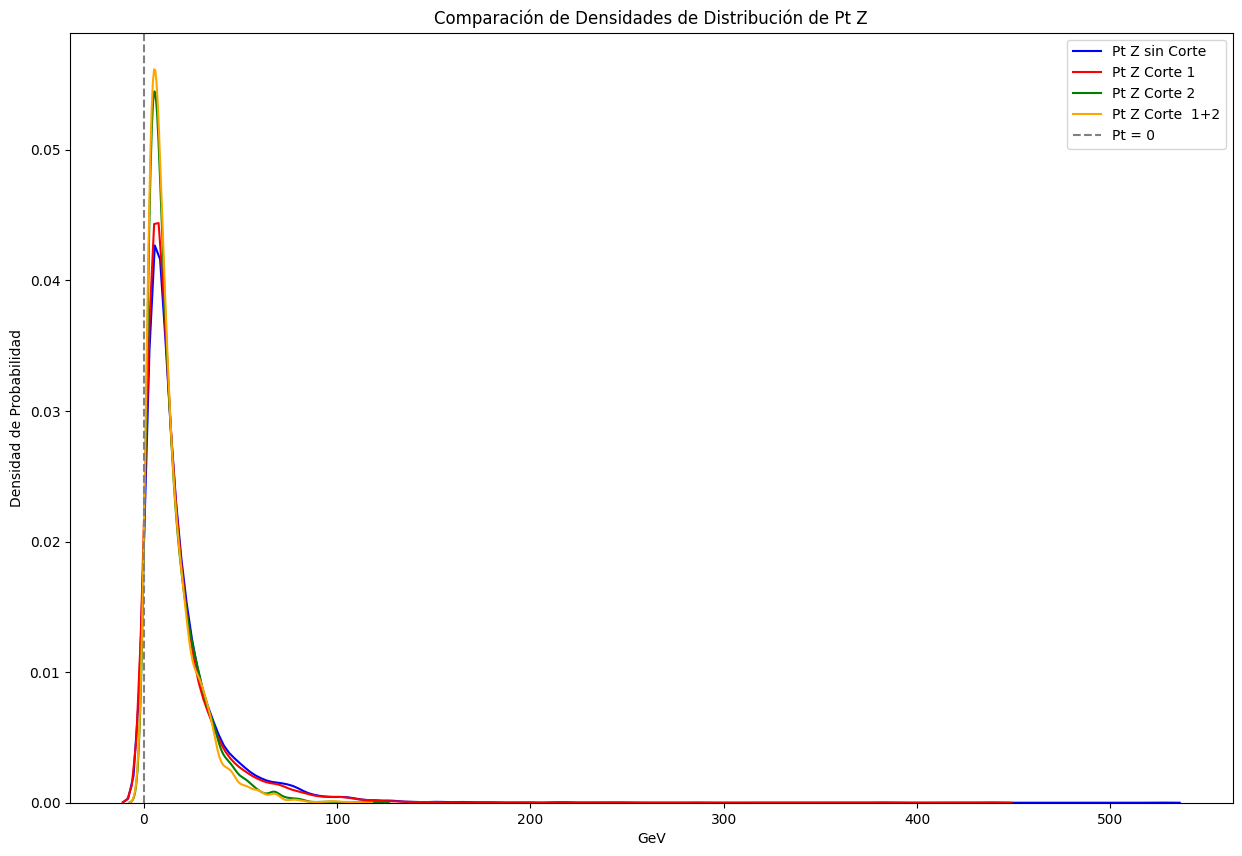

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura y un eje para el gráfico
fig, ax = plt.subplots(figsize=(15, 10))

# Densidad de distribución para "masa sin Corte"
sns.kdeplot(data=particles["ptz"], ax=ax, label='Pt Z sin Corte', color='blue')

# Densidad de distribución para "masa Corte 1"
sns.kdeplot(data=particles_c1["ptz"], ax=ax, label='Pt Z Corte 1', color='red')

# Densidad de distribución para "masa Corte 2"
sns.kdeplot(data=particles_c2["ptz"], ax=ax, label='Pt Z Corte 2', color='green')

# Densidad de distribución para "masa Corte 2"
sns.kdeplot(data=particles_c12["ptz"], ax=ax, label='Pt Z Corte  1+2', color='orange')

# Configuración del gráfico
ax.set_title('Comparación de Densidades de Distribución de Pt Z')
ax.set_xlabel('GeV')
ax.set_ylabel('Densidad de Probabilidad')
ax.legend()


plt.axvline(x=0, color='gray', linestyle='--', label='Pt = 0')
plt.legend()
# Mostrar la figura
plt.show()


In [53]:
pd.Series(zx).mean(), pd.Series(zx).std(), pd.Series(zy).mean(), pd.Series(zy).std()

(-0.1676244570106127,
 21.481149193448378,
 0.25615069787922445,
 20.760156241908827)

In [54]:
#pd.Series(vx1).mean(), pd.Series(vx1).std(), pd.Series(vy1).mean(), pd.Series(vy1).std()

NameError: ignored

In [ ]:
#pd.Series(vx2).mean(), pd.Series(vx2).std(), pd.Series(vy2).mean(), pd.Series(vy2).std()